In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

coffee_full = pd.read_csv('coffee_dataset.csv')

## This is alternative to first hypothesis
## This is second approach

H0 = Average height of coffee drinkers <= 70
H1 = Avg. ht. > 70

## we assume that the null is true and we know that sampling distribution would look like if we were to simulate from the closest value under the null to the alternative i.e. to 70 which is closest value under the hypothesis to our alternative hypothesis

## We can use std. deviation of sampling distribution to determine what the sampling distribution would look like if it came from null hypothesis

## We'll simulate from normal distribution in this case

In [2]:
#std. deviation of sample distribution

coffee_sample = coffee_full.sample(150) #creating sample

#bootstrapping

bootmean =[]

for _ in range(10000):
    bootsample = coffee_sample.sample(150, replace=True)
    bootmean.append(bootsample.height.mean())
    
#now we have means of all the bootstrap samples

In [3]:
#std deviation

np.std(bootmean)

0.26484919595691486

## With central limit theorem we know that with sample size of 150, the mean should follow normal distribution

(array([  19.,  141.,  590., 1650., 2652., 2602., 1644.,  561.,  120.,
          21.]),
 array([66.79407248, 66.98555518, 67.17703788, 67.36852058, 67.56000329,
        67.75148599, 67.94296869, 68.13445139, 68.3259341 , 68.5174168 ,
        68.7088995 ]),
 <a list of 10 Patch objects>)

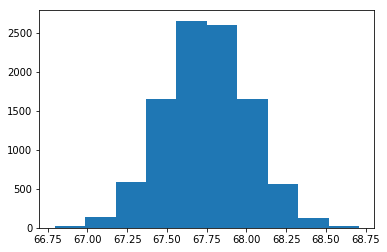

In [4]:
plt.hist(bootmean)

## Drawing normal distribution from std. deviation 

(array([ 18.,  57., 102., 196., 245., 191., 112.,  55.,  20.,   4.]),
 array([69.27577694, 69.4319965 , 69.58821606, 69.74443562, 69.90065518,
        70.05687474, 70.2130943 , 70.36931387, 70.52553343, 70.68175299,
        70.83797255]),
 <a list of 10 Patch objects>)

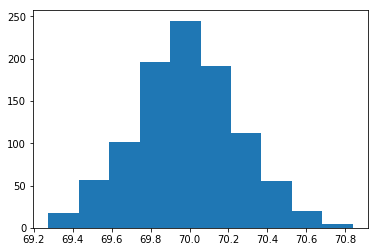

In [7]:
null_var = np.random.normal(70, np.std(bootmean), 1000)
plt.hist(null_var)

In [8]:
# sample mean is
coffee_sample.height.mean()

67.74652328125816

## As you can see the sample mean of height is 67.75 which is far below this distribution from null
## If the sameple mean value were to fall closer to the center of 70, it would be a value that we would expect from from the null hypothesis, and therefore the null would have been more likely to be true

## In this case, the sample mean is so far out in the tail that we don't think it probably came from the null hypothesized value

In [11]:
sample_mean = coffee_sample.height.mean()

In [12]:
(null_var > sample_mean).mean()

1.0

## large p-value suggests we should not move away from null hypothesis
## so in this case, we should stay with null hypothesis i.e. mean being less than 70 

## since (null_var > sample_mean).mean() is 1, we won't move away from null hypothesis, which suggest the mean height of our population is truly less or equal to 70 